In [2]:
# Import pandas
import pandas as pd

# File paths for cleaned data
benin_file = '../src/data/benin_clean.csv'
sierra_file = '../src/data/sierraleone_clean.csv'
togo_file = '../src/data/togo_clean.csv'

# Load each country's cleaned dataset
df_benin = pd.read_csv(benin_file)
df_sierra = pd.read_csv(sierra_file)
df_togo = pd.read_csv(togo_file)

# Quick check
print("Benin data shape:", df_benin.shape)
print("Sierra Leone data shape:", df_sierra.shape)
print("Togo data shape:", df_togo.shape)

# Display first few rows of each
display(df_benin.head())
display(df_sierra.head())
display(df_togo.head())


Benin data shape: (525600, 18)
Sierra Leone data shape: (525600, 17)
Togo data shape: (525600, 17)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Month
0,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,8
1,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,8
2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,8
3,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,8
4,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,8


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


Metric Comparison o Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).

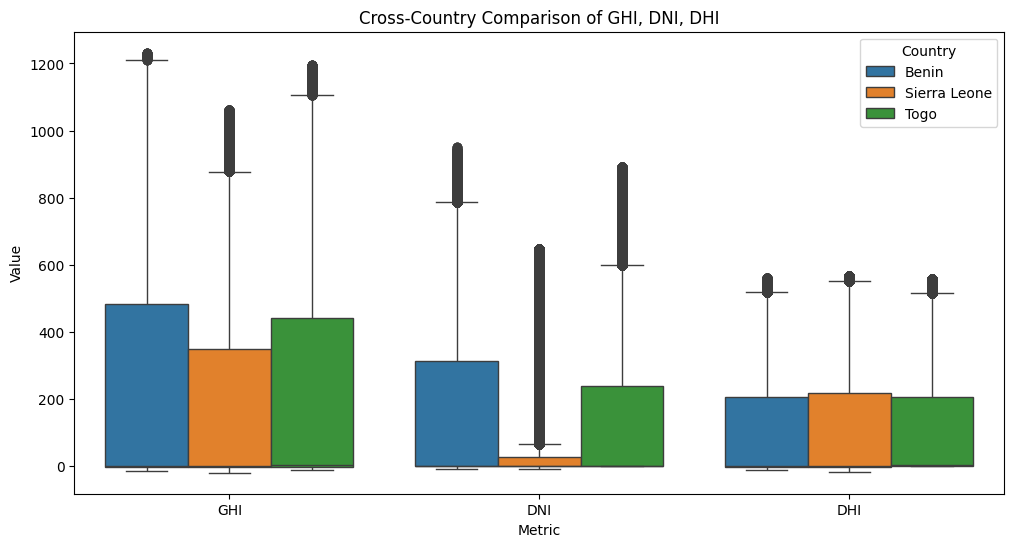

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare a long-format DataFrame for seaborn
df_metric = pd.DataFrame({
    'GHI': pd.concat([df_benin['GHI'], df_sierra['GHI'], df_togo['GHI']]),
    'DNI': pd.concat([df_benin['DNI'], df_sierra['DNI'], df_togo['DNI']]),
    'DHI': pd.concat([df_benin['DHI'], df_sierra['DHI'], df_togo['DHI']]),
    'Country': ['Benin']*len(df_benin) + ['Sierra Leone']*len(df_sierra) + ['Togo']*len(df_togo)
})

# Melt for seaborn
df_melted = df_metric.melt(id_vars='Country', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_melted, x='Metric', y='Value', hue='Country')
plt.title('Cross-Country Comparison of GHI, DNI, DHI')
plt.ylabel('Value')
plt.show()

Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.

In [4]:
import pandas as pd

# List of cleaned DataFrames and country names
dfs = [df_benin, df_sierra, df_togo]
countries = ['Benin', 'Sierra Leone', 'Togo']

# Columns to summarize
metrics = ['GHI', 'DNI', 'DHI']

# Initialize summary table
summary_list = []

for df, country in zip(dfs, countries):
    stats = df[metrics].agg(['mean', 'median', 'std']).transpose()
    stats['Country'] = country
    summary_list.append(stats.reset_index().rename(columns={'index':'Metric'}))

# Concatenate all countries
summary_table = pd.concat(summary_list, ignore_index=True)

# Reorder columns
summary_table = summary_table[['Country', 'Metric', 'mean', 'median', 'std']]

# Display summary
print(summary_table)


        Country Metric        mean  median         std
0         Benin    GHI  240.340468     1.8  330.865639
1         Benin    DNI  167.187516    -0.1  261.710501
2         Benin    DHI  107.673604     1.6  149.084556
3  Sierra Leone    GHI  194.017501     0.3  288.352055
4  Sierra Leone    DNI   82.057501    -0.1  170.203953
5  Sierra Leone    DHI  108.521550    -0.1  152.304844
6          Togo    GHI  229.793299     2.1  321.599351
7          Togo    DNI  148.782736     0.0  247.845708
8          Togo    DHI  109.995110     2.5  148.460068


Statistical Test- ANOVA

In [5]:
from scipy import stats

# Extract GHI values for each country
ghi_benin = df_benin['GHI']
ghi_sierra = df_sierra['GHI']
ghi_togo = df_togo['GHI']

# One-way ANOVA
f_stat, p_value = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"One-way ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.5f}")

# Optional: Non-parametric alternative (Kruskal-Wallis)
h_stat, p_kruskal = stats.kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"Kruskal-Wallis: H-statistic = {h_stat:.2f}, p-value = {p_kruskal:.5f}")

One-way ANOVA: F-statistic = 3139.78, p-value = 0.00000
Kruskal-Wallis: H-statistic = 5475.98, p-value = 0.00000


Bonus Visual Summary

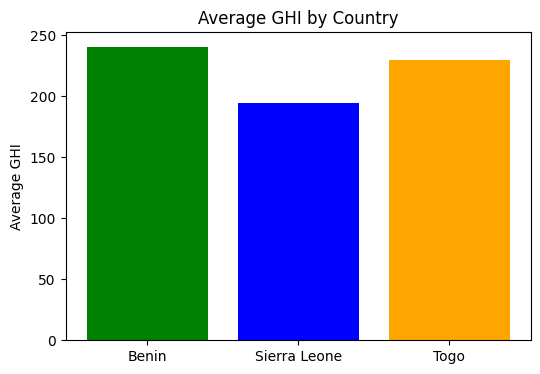

In [6]:
import matplotlib.pyplot as plt

# Calculate average GHI per country
avg_ghi = {
    'Benin': df_benin['GHI'].mean(),
    'Sierra Leone': df_sierra['GHI'].mean(),
    'Togo': df_togo['GHI'].mean()
}

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(avg_ghi.keys(), avg_ghi.values(), color=['green', 'blue', 'orange'])
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.show()

basic Streamlit app template

In [9]:
# compare_dashboard.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Solar Data Dashboard", layout="wide")

st.title("Cross-Country Solar Data Dashboard")

# Sidebar for country selection
country = st.sidebar.selectbox("Select Country", ["Benin", "Sierra Leone", "Togo"])

# Load data dynamically based on selection
if country == "Benin":
    df = pd.read_csv("data/benin_clean.csv")
elif country == "Sierra Leone":
    df = pd.read_csv("data/sierraleone_clean.csv")
else:
    df = pd.read_csv("data/togo_clean.csv")

st.subheader(f"{country} - Key Metrics")

# Display summary statistics
st.dataframe(df.describe())

# Line plots for GHI, DNI, DHI, Tamb
st.subheader("Time Series")
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df['Timestamp'], df['GHI'], label='GHI')
ax.plot(df['Timestamp'], df['DNI'], label='DNI')
ax.plot(df['Timestamp'], df['DHI'], label='DHI')
ax.plot(df['Timestamp'], df['Tamb'], label='Tamb')
ax.set_xlabel("Timestamp")
ax.set_ylabel("Values")
ax.legend()
st.pyplot(fig)

# Scatter plot of ModA vs ModB
st.subheader("ModA vs ModB")
fig2, ax2 = plt.subplots(figsize=(6,4))
sns.scatterplot(x='ModA', y='ModB', data=df, ax=ax2)
st.pyplot(fig2)

# Correlation heatmap
st.subheader("Correlation Heatmap")
fig3, ax3 = plt.subplots(figsize=(6,5))
corr = df[['GHI','DNI','DHI','TModA','TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax3)
st.pyplot(fig3)

# Optional: Bubble chart GHI vs Tamb with RH
st.subheader("GHI vs Tamb (Bubble size = RH)")
fig4, ax4 = plt.subplots(figsize=(8,5))
scatter = ax4.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
ax4.set_xlabel("GHI")
ax4.set_ylabel("Tamb")
st.pyplot(fig4)

2025-11-11 01:18:04.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 01:18:04.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 01:18:04.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 01:18:04.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 01:18:04.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 01:18:04.294 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 01:18:04.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-11 01:18:04.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

FileNotFoundError: [Errno 2] No such file or directory: 'data/benin_clean.csv'